# Ozone Data Gathering (sample station: BETN073)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-7) for the station "BETN073:43N073 - VEZIN" in Belgium.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0110000700100dymax.1-1-1992.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETM7050000700100dymax.1-1-1999.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0040000700100dymax.1-1-2001.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETB0060000700100dymax.1-1-2002.31-12-2012"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BE0312A0000700100dymax.1-1-1997.31-12-1998"
# fname = "AirBase_BE_v8/OzoneBelgiumInvalid/BETAND30000700100dymax.1-1-2001.31-12-2001"

# fname = "AirBase_BE_v8\PM10BelgiumInvalid/BETR5020000500101day.1-1-2008.31-12-2012"
fname = "AirBase_BE_v8\PM10BelgiumInvalid/BETR5100000500100day.1-1-1998.31-12-2005"

columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))

df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])

### Daily time-series (from 1-1-1990 to 31-12-2011)
Initialization of an empty multi-variate time-series frame.
*Note:'Var1' is added as a placeholder for future time-series data augmentation (with weather data for a station).*

In [20]:
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
#ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

Min date: 1998-01-01 00:00:00, Max Date: 2005-12-31 00:00:00


### Filling empty ts with O3 data (Valid readings: {0}, invalid readings {-1, 0} as Nans)
Only valid ozone data is inserted into the time-series.

In [21]:
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, 'O3'] = row[columnIndex] # Set value to time-series

### First month data
CSV vs time-series data-frame (first 31 days of January 1990).

In [22]:
# First 31 dayCSV vs time-series data-frame (last month).s of CSV data
df1.head(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
0,1998-01-01,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,...,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0


In [23]:
# First 31 days of time-series data
ts.head(31)

,O3
1998-01-01,NaN
1998-01-02,NaN
1998-01-03,NaN
1998-01-04,NaN
1998-01-05,NaN
1998-01-06,NaN
1998-01-07,NaN
1998-01-08,NaN
1998-01-09,NaN
1998-01-10,NaN


### Last month data
CSV vs time-series data-frame (31 days of December 2011).

In [24]:
# Last 31 days of CSV data
df1.tail(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
95,2005-12-01,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,...,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0,-9999.0,0


In [25]:
# Last 31 days of time-series data
ts.tail(31)

,O3
2005-12-01,NaN
2005-12-02,NaN
2005-12-03,NaN
2005-12-04,NaN
2005-12-05,NaN
2005-12-06,NaN
2005-12-07,NaN
2005-12-08,NaN
2005-12-09,NaN
2005-12-10,NaN


Histogram (50 bins) and boxplot of all the O3 values of the first year.

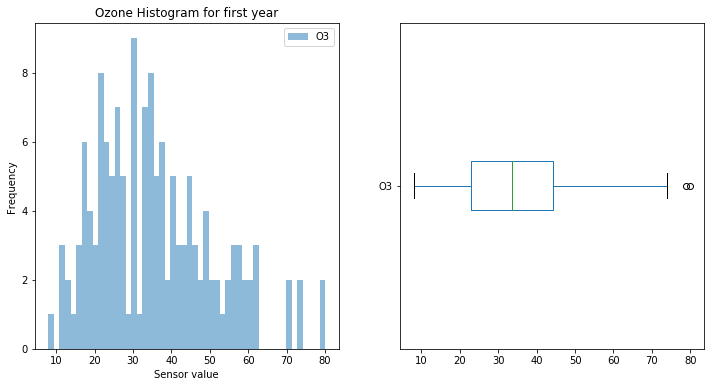

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for first year')
ax[0].grid(True)
ts.head(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.head(365).plot.box(vert=False, ax = ax[1]);

Histogram (50 bins) and boxplot of all the O3 values of the last year.

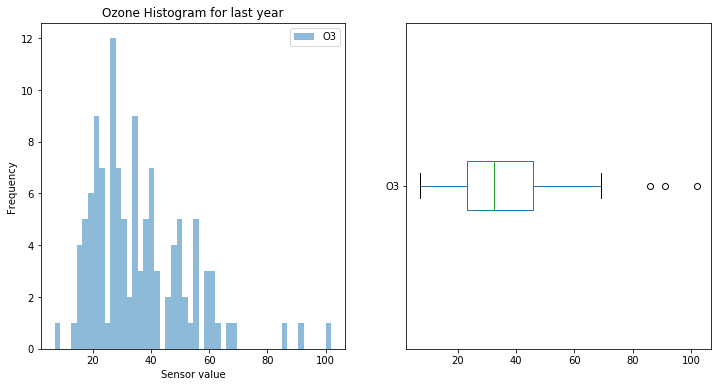

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for last year')
ax[0].grid(True)
ts.tail(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.tail(365).plot.box(vert=False, ax = ax[1]);

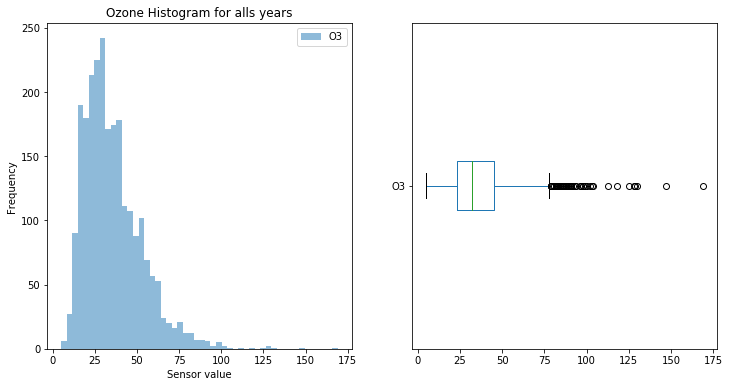

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for alls years')
ax[0].grid(True)
ts.plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.plot.box(vert=False, ax = ax[1]);

Some basic descriptive statistics for 1990:

In [29]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.head(365).describe()

,O3
count,144.000000
mean,35.687500
std,15.378429
min,8.000000
25%,23.000000
50%,33.500000
75%,44.250000
max,80.000000


In [30]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.tail(365).describe()

,O3
count,118.000000
mean,35.872881
std,16.525322
min,7.000000
25%,23.250000
50%,32.500000
75%,45.750000
max,102.000000


In [31]:
ts.describe()

,O3
count,2426.000000
mean,35.594394
std,17.352060
min,5.000000
25%,23.000000
50%,32.000000
75%,45.000000
max,169.000000


Time-series plot of O3, first 365 days:

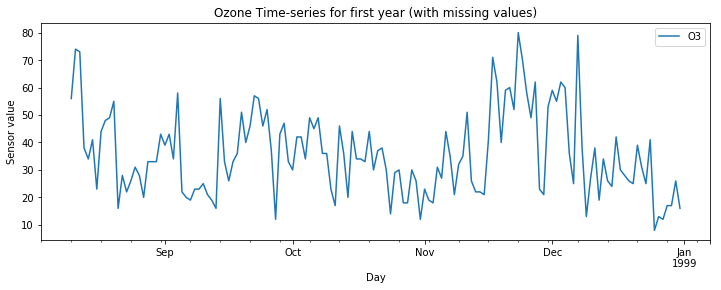

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for first year (with missing values)')
ax.grid(True)
ts.head(365).plot(ax = ax);

Time-series plot of O3, last 365 days (with missing data):

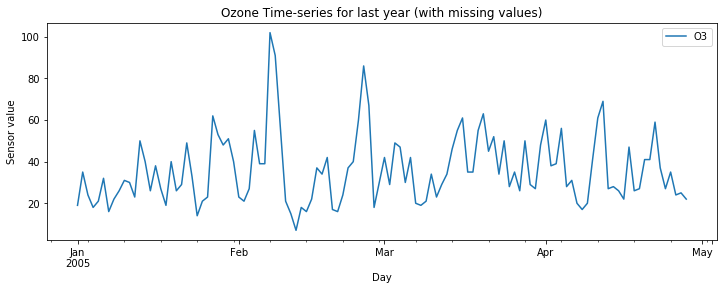

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for last year (with missing values)')
ax.grid(True)
ts.tail(365).plot(ax = ax);

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

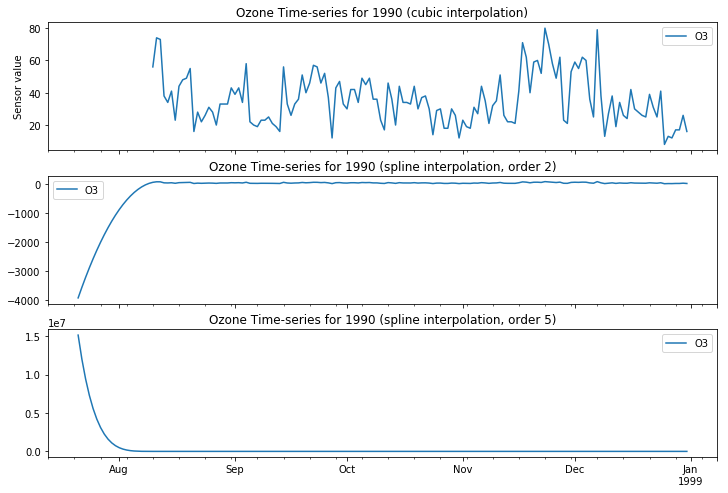

In [34]:
ts2a = ts.interpolate(method='cubic',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='spline',order=2,limit=20,limit_direction='both')
ts2c = ts.interpolate(method='spline',order=5,limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=False)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (cubic interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (spline interpolation, order 2)')
ax[2].set_title('Ozone Time-series for 1990 (spline interpolation, order 5)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

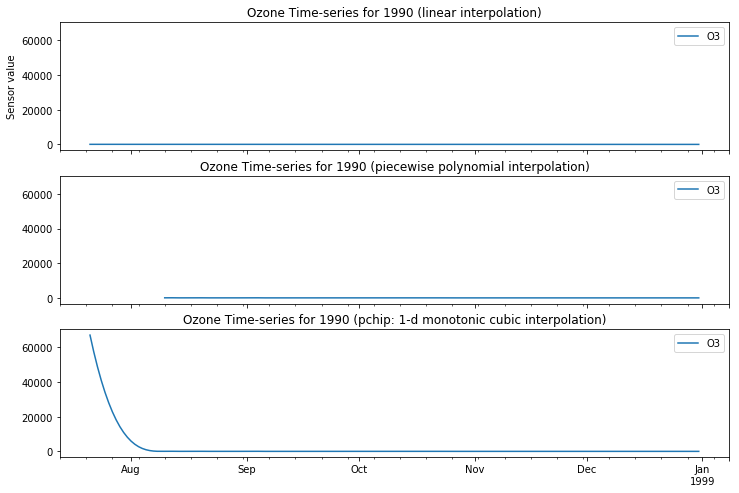

In [35]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

# Meta-data for all O3 stations

Reading the 'BE-meta.xml' file, for the stations in Belgium.
All the available XML tags:

In [336]:
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()
xml = ET.tostring(root, encoding='utf8', method='xml')
 
xml_root = etree.fromstring(xml)
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
 
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
 
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1], ', '.join(attribs) if len(attribs) > 0 else '-'))

0: airbase [{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation]
    1: country [-]
        2: country_name [-]
        2: country_iso_code [-]
        2: country_eu_member [-]
        2: network [-]
            3: network_code [-]
            3: network_name [-]
            3: network_short_name [-]
            3: network_start_date [-]
            3: network_time_reference_basis [-]
            3: network_type [-]
            3: network_manager [-]
                4: organization [-]
                    5: organization_name [-]
                    5: organization_address [-]
                    5: organization_city [-]
                    5: organization_phone_number [-]
                    5: organization_fax_number [-]
                4: person [-]
                    5: person_last_name [-]
                    5: person_first_name [-]
                    5: person_title [-]
            3: network_data_supplier [-]
                4: organization [-]
              

List of all the measurement stations in Belgium:

In [327]:
for child in root:    
    for child1 in child:        
        print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))

tag: country_name, attrib: {}, text: Belgium
tag: country_iso_code, attrib: {}, text: BE
tag: country_eu_member, attrib: {}, text: Y
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: station, attrib: {'Id': 'BEMAT01:00AT01 - ANTWERPEN'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE01:00BE01 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE02:00BE02 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE06:00BE06 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE07:00BE07 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE08:00BE08 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE09:00BE09 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE10:00BE10 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE11:00BE11 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE15:00BE15 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMEK0

Example browsing the meta-data of the station 73 - VEZIN in Belgium:

In [48]:
for child in root:    
    for child1 in child:          
        if child1.tag == "station":
           # print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))
#             if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
            if child1.attrib['Id']=="BETN012:44N012 - MOERKERKE":  
                for child2 in child1:
#                     print ("tag: {}, attrib: {}, text: {}".format(child2.tag, child2.attrib, child2.text))
                    if child2.tag == "station_info":
                        for child3 in child2:
                            print ("tag: {}, attrib: {}, text: {}".format(child3.tag, child3.attrib, child3.text))
#                          if child2.attrib['component'] == "Ozone (air) - UV absorption":
#                             for child3 in child2:
#                                 if child3.tag == "statistics":
#                                     if child3.attrib['Year'] == "2010":
#                                         for child4 in child3:
#                                             if child4.tag == "statistics_average_group":
#                                                 if child4.attrib['value'] == "day":
#                                                     for child5 in child4:
#                                                         if child5.tag == "statistic_set":
#                                                             if child5.attrib['type'] == "General":
#                                                                 for child6 in child5:#                                                                     
#                                                                     if child6.tag == "statistic_result":                                                                        
#                                                                         print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
#                                                                         for child7 in child6:
#                                                                             print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))

tag: EMEP_station, attrib: {}, text: yes
tag: station_local_code, attrib: {}, text: 44N012
tag: station_airbase_code, attrib: {}, text: BE0033R
tag: station_name, attrib: {}, text: 44N012 - MOERKERKE
tag: station_nuts_level0, attrib: {}, text: BE
tag: station_nuts_level1, attrib: {}, text: 2
tag: station_nuts_level2, attrib: {}, text: 5
tag: station_nuts_level3, attrib: {}, text: 1
tag: sabe_country_code, attrib: {}, text: BE
tag: sabe_unit_code, attrib: {}, text: BE231006
tag: sabe_unit_name, attrib: {}, text: Damme
tag: station_start_date, attrib: {}, text: 1977-11-01
tag: station_latitude_decimal_degrees, attrib: {}, text: 51.255100
tag: station_longitude_decimal_degrees, attrib: {}, text: 3.361292
tag: station_latitude_dms, attrib: {}, text: +051°15'18.36"
tag: station_longitude_dms, attrib: {}, text: +003°21'40.65"
tag: station_altitude, attrib: {}, text: 3
tag: type_of_station, attrib: {}, text: Background
tag: station_type_of_area, attrib: {}, text: rural
tag: station_characteri

Print all stations with "BETN" prefix (rural background stations). Store lon/lat in dictionary.

In [346]:
stationLonLat = {}
for child in root:    
    for child1 in child:          
        if child1.tag == "station":           
            if child1.attrib['Id'].startswith("BE"):
                for child2 in child1:
                    if child2.tag == "station_info":
                        lon = 0.0
                        lat = 0.0
                        population = 0
                        station_altitude = 0
                        type_of_station = 0
                        station_type_of_area = 0
                        station_characteristic_of_zone = 0
                        station_ozone_classification = 0
                        for child3 in child2:         
                            if child3.tag == "station_latitude_decimal_degrees":
                                lat = float(child3.text)
                            if child3.tag == "station_longitude_decimal_degrees":
                                lon = float(child3.text)
                            if child3.tag == "population":
                                population = float(child3.text)
                            if child3.tag == "station_altitude":
                                station_altitude = float(child3.text)
                            if child3.tag == "type_of_station":
                                type_of_station = ord(child3.text[0]) % 10                             
                            if child3.tag == "station_type_of_area":
                                station_type_of_area = ord(child3.text[0])     % 10                             
                            if child3.tag == "station_characteristic_of_zone":
                                station_characteristic_of_zone = ord(child3.text[0])  % 10                                
                            if child3.tag == "station_ozone_classification":
                                station_ozone_classification = ord(child3.text[0]) % 10 
                                
                        print ("{} (lon: {}, lat: {}, population: {}, altitude: {}, type_of_station: {} {} {})"
                               .format(float(lon), float(lat), station_altitude, population, type_of_station, 
                                station_type_of_area, station_characteristic_of_zone, station_ozone_classification))
                        stationLonLat[child1.attrib['Id'][:7]] = (
                            float(lon), float(lat), population, station_altitude, type_of_station, 
                            station_type_of_area, station_characteristic_of_zone, station_ozone_classification)

4.396211 (lon: 51.19762, lat: 7.0, population: 460.0, altitude: 3, type_of_station: 7 4 0)
4.820047 (lon: 51.324501, lat: 29.0, population: 1.0, altitude: 3, type_of_station: 5 5 0)
4.801531 (lon: 51.332619, lat: 29.0, population: 1.0, altitude: 3, type_of_station: 5 5 0)
4.817711 (lon: 51.329193, lat: 32.0, population: 1.0, altitude: 3, type_of_station: 5 5 0)
4.820458 (lon: 51.325588, lat: 35.0, population: 1.0, altitude: 3, type_of_station: 5 5 0)
4.8231 (lon: 51.321281, lat: 29.0, population: 1.0, altitude: 3, type_of_station: 5 4 0)
4.788753 (lon: 51.3269, lat: 31.0, population: 1.0, altitude: 3, type_of_station: 5 4 0)
4.805172 (lon: 51.321556, lat: 29.0, population: 1.0, altitude: 3, type_of_station: 5 4 0)
4.824506 (lon: 51.328675, lat: 31.0, population: 1.0, altitude: 3, type_of_station: 5 4 0)
4.822739 (lon: 51.322722, lat: 28.0, population: 1.0, altitude: 3, type_of_station: 5 4 0)
5.363797 (lon: 51.125137, lat: 65.0, population: 0.0, altitude: 6, type_of_station: 4 0 0)
5.5

In [347]:
print("stationLonLat:", stationLonLat)

stationLonLat: {'BEMAT01': (4.396211, 51.19762, 460.0, 7.0, 3, 7, 4, 0), 'BEMBE01': (4.820047, 51.324501, 1.0, 29.0, 3, 5, 5, 0), 'BEMBE02': (4.801531, 51.332619, 1.0, 29.0, 3, 5, 5, 0), 'BEMBE06': (4.817711, 51.329193, 1.0, 32.0, 3, 5, 5, 0), 'BEMBE07': (4.820458, 51.325588, 1.0, 35.0, 3, 5, 5, 0), 'BEMBE08': (4.8231, 51.321281, 1.0, 29.0, 3, 5, 4, 0), 'BEMBE09': (4.788753, 51.3269, 1.0, 31.0, 3, 5, 4, 0), 'BEMBE10': (4.805172, 51.321556, 1.0, 29.0, 3, 5, 4, 0), 'BEMBE11': (4.824506, 51.328675, 1.0, 31.0, 3, 5, 4, 0), 'BEMBE15': (4.822739, 51.322722, 1.0, 28.0, 3, 5, 4, 0), 'BEMEK03': (5.363797, 51.125137, 0.0, 65.0, 6, 4, 0, 0), 'BEMGK02': (5.517372, 50.937019, 61.0, 75.0, 3, 5, 4, 0), 'BEMGK03': (5.506403, 50.931221, 61.0, 83.0, 3, 5, 4, 0), 'BEMGK04': (5.5168, 50.93285, 64.0, 83.0, 3, 5, 4, 0), 'BEMGK05': (5.525538, 50.941044, 61.0, 83.0, 3, 5, 4, 0), 'BEMGK06': (5.469322, 50.92844, 61.0, 83.0, 3, 5, 4, 0), 'BEMGK07': (5.501561, 50.898647, 61.0, 83.0, 3, 5, 4, 0), 'BEMGK08': (5.556

Store an ordered dictionary for the next closest station of the current:

In [330]:
import math
from collections import OrderedDict

def getDistanceDegrees(station1, station2):
    return math.sqrt((stationLonLat[station1][0] -stationLonLat[station2][0])**2 + (stationLonLat[station1][1] -stationLonLat[station2][1])**2)

distanceStationToStation = {}

for station1 in stationLonLat.keys():
    distancesToStation = {}
    for station2 in stationLonLat.keys():
        if station1 != station2:
            distancesToStation[station2] = getDistanceDegrees(station1, station2) 
    distanceStationToStation[station1] = OrderedDict(sorted(distancesToStation.items(), key=lambda t: t[1]))
         

In [110]:
distanceStationToStation["BETN073"].keys()

odict_keys(['BEVN073', 'BEMNMC6', 'BEMAND1', 'BEMNM01', 'BETN054', 'BEVLAN1', 'BEMTIE1', 'BEMN093', 'BETN093', 'BEVN093', 'BEPN093', 'BEMN063', 'BETN063', 'BEVN063', 'BEPN063', 'BEB0225', 'BEMENG1', 'BEB0940', 'BETR240', 'BEVR240', 'BEB0227', 'BEB0226', 'BETR510', 'BETN035', 'BEVN035', 'BEPN035', 'BEB0504', 'BEB0218', 'BEMCHA2', 'BETR502', 'BEMJMP1', 'BEB0923', 'BETR223', 'BEMCHA1', 'BEB0901', 'BETR501', 'BEVR501', 'BEB0509', 'BEB0505', 'BEMHAS1', 'BEB0514', 'BEVR231', 'BEMN100', 'BETN100', 'BEVN100', 'BEPN100', 'BELTS12', 'BEVTS12', 'BE0443A', 'BEMCHA6', 'BEVN025', 'BETN025', 'BETH201', 'BEVTS20', 'BELTS20', 'BELTS21', 'BETR511', 'BEPR511', 'BEMN045', 'BEBN045', 'BETN045', 'BELTS07', 'BETE811', 'BEMTV01', 'BEB0202', 'BETR222', 'BEPR222', 'BEVR522', 'BEB0506', 'BEB0206', 'BEMLIE1', 'BETN026', 'BEMTES5', 'BEMCHA7', 'BETR512', 'BETR201', 'BEVR201', 'BEMLIE4', 'BELLD01', 'BETE813', 'BELTS06', 'BELLD02', 'BEPSZ02', 'BELSZ02', 'BEB0834', 'BEMANG1', 'BETM204', 'BEBSZ01', 'BELSZ01', 'BEPSZ01'

In [111]:
distanceStationToStation["BETN073"]

OrderedDict([('BEVN073', 0.0),
             ('BEMNMC6', 0.032740777327357216),
             ('BEMAND1', 0.053884617109152856),
             ('BEMNM01', 0.12255483043927587),
             ('BETN054', 0.2384026903392695),
             ('BEVLAN1', 0.2694563422022228),
             ('BEMTIE1', 0.305556435090148),
             ('BEMN093', 0.33611091541929794),
             ('BETN093', 0.33611091541929794),
             ('BEVN093', 0.33611091541929794),
             ('BEPN093', 0.33611091541929794),
             ('BEMN063', 0.3546874220408722),
             ('BETN063', 0.3546874220408722),
             ('BEVN063', 0.3546874220408722),
             ('BEPN063', 0.3546874220408722),
             ('BEB0225', 0.37525281157774176),
             ('BEMENG1', 0.41693307642954036),
             ('BEB0940', 0.41693307642954036),
             ('BETR240', 0.41693307642954036),
             ('BEVR240', 0.41693307642954036),
             ('BEB0227', 0.43012211219838625),
             ('BEB0226', 0.43251237

## TODO: Station Clustering

Cluster stations in order to minimize the amount of weather-data sampling points:

TODO: compare model performance:
- Lon/Lat clustering only.
- Full params clustering.

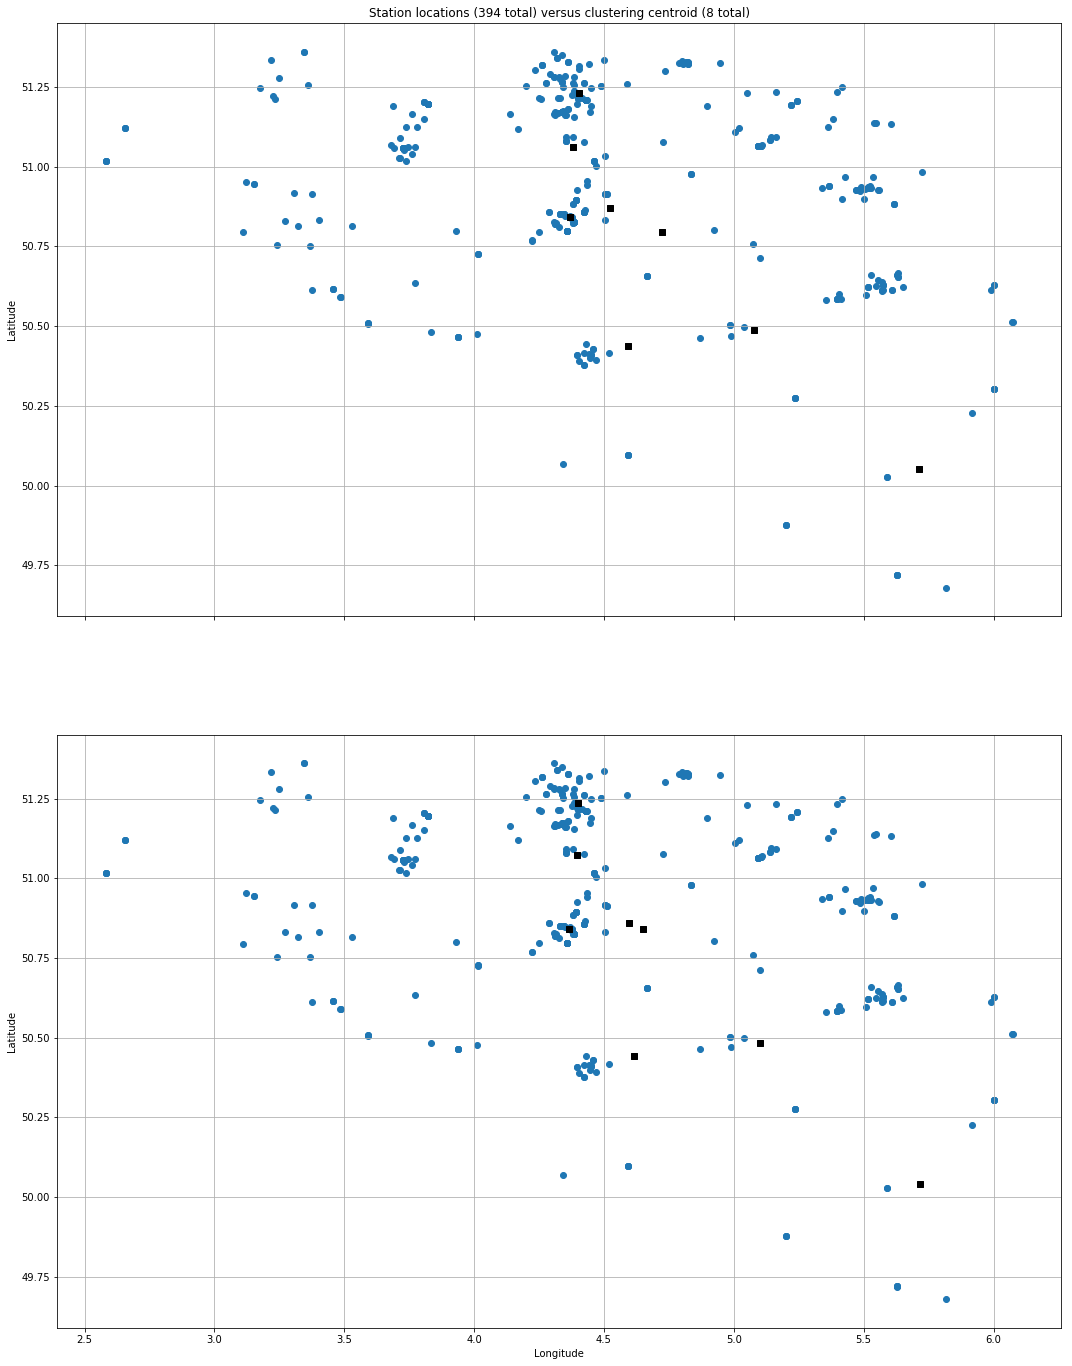

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans, KMeans

clusters = 8

coordinates2 = []
for stationName in stationLonLat:
    coordinates2.append((stationLonLat[stationName][0], stationLonLat[stationName][1]))
coordinates2 = np.array(coordinates2)  

# lat
# lon
# "station_altitude":     
# "population":                 
# "type_of_station":
# "station_type_of_area":
# "station_characteristic_of_zone":
# "station_ozone_classification":
coordinates = []
for stationName in stationLonLat:
    coordinates.append((
        stationLonLat[stationName][0],  # lat
        stationLonLat[stationName][1]  # lon
        ,stationLonLat[stationName][2] # alt
        , stationLonLat[stationName][3] # pop
        , stationLonLat[stationName][4] # station type
        , stationLonLat[stationName][5] # area type
        , stationLonLat[stationName][6] # zone
        , stationLonLat[stationName][7] # ozone class
   ))
coordinates = np.array(coordinates)   

kmeans1 = MiniBatchKMeans(n_clusters=clusters, random_state=0, max_iter=10).fit(coordinates)
codebook = kmeans1.cluster_centers_
kmeansSk = KMeans(n_clusters=clusters, random_state=0, max_iter=10).fit(coordinates)
codebook2 = kmeansSk.cluster_centers_
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 24), sharex=True, sharey=False)
ax[0].scatter(coordinates2[:, 0], coordinates2[:, 1])
ax[0].scatter(codebook[:, 0], codebook[:, 1], c='k', marker="s")
ax[0].set_ylabel('Latitude')
ax[0].set_title('Station locations ({} total) versus clustering centroid ({} total)'.format(coordinates.shape[0], clusters))
ax[0].grid(True)
ax[1].scatter(coordinates2[:, 0], coordinates2[:, 1])
ax[1].scatter(codebook2[:, 0], codebook2[:, 1], c='k', marker="s")
ax[1].set_ylabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[1].grid(True)

## TODO: 2D Interpolations
https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#id8

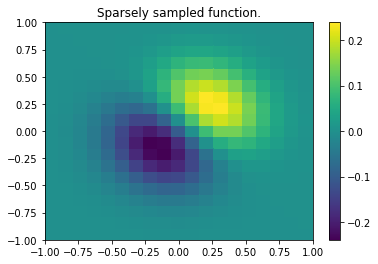

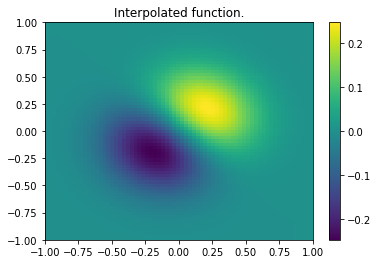

In [332]:
from scipy import interpolate

x, y = np.mgrid[-1:1:20j, -1:1:20j]
z = (x+y) * np.exp(-6.0*(x*x+y*y))

plt.figure()
plt.pcolor(x, y, z)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

plt.figure()
plt.pcolor(xnew, ynew, znew)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

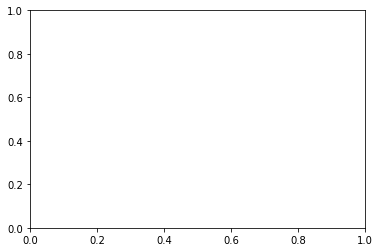

In [339]:
from scipy import interpolate

# x, y = np.mgrid[-1:1:20j, -1:1:20j]
# z = (x+y) * np.exp(-6.0*(x*x+y*y))

# x = np.random.uniform(2,7, 394)
x = coordinates[:, 0]
# y = np.random.uniform(50, 57, 394)
y = coordinates[:, 1]
# z = np.random.uniform(1, 30, 394)
z =  coordinates[:, 2]
# z = np.zeros_like(y)

plt.figure()
plt.pcolor(x, y, z)
plt.colorbar()
plt.title("Sparsely sampled function.")
plt.show()

# xnew, ynew = np.mgrid[-1:1:70j, -1:1:70j]
# tck = interpolate.bisplrep(x, y, z, s=0)
# znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)

# plt.figure()
# plt.pcolor(xnew, ynew, znew)
# plt.colorbar()
# plt.title("Interpolated function.")
# plt.show()

### 2d rbf interpolation
https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html#id12

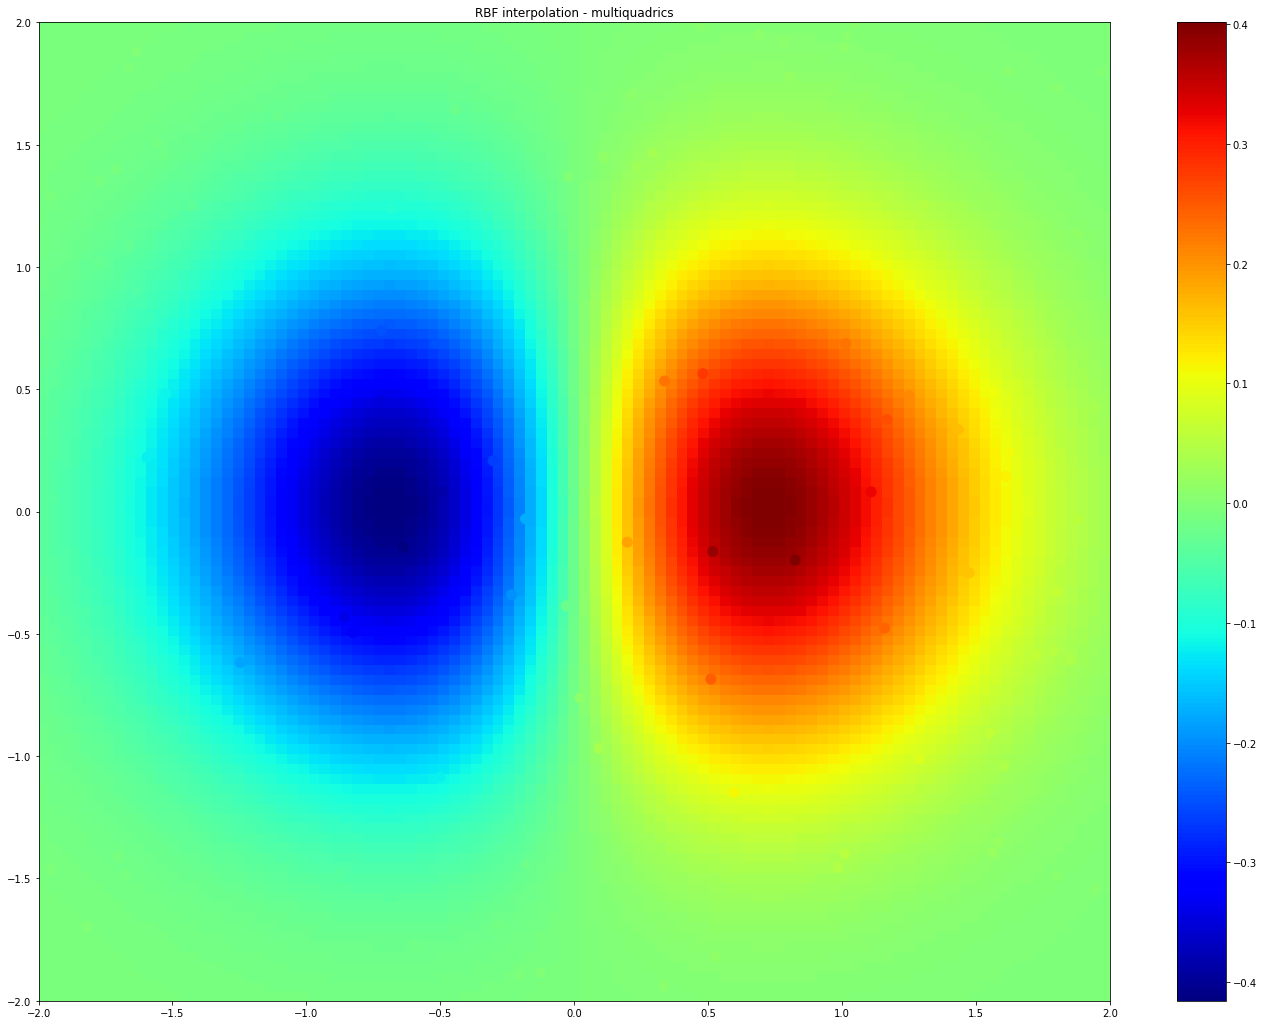

In [334]:
from scipy.interpolate import Rbf
from matplotlib import cm

# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)

# ti = np.linspace(-2.0, 2.0, 100)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)

# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

# plot the result
# plt.subplot(1, 1, 1)
plt.figure(figsize=(24, 18))
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

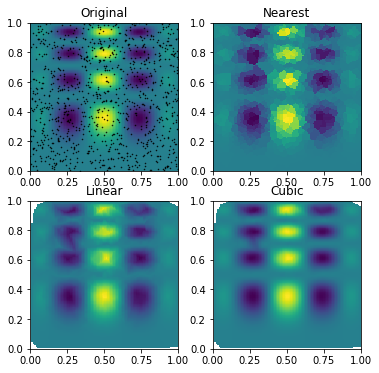

In [264]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

xMin = min(x)
xMax = max(x)
yMin = min(y)
yMax = max(y)

# grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
grid_x, grid_y = np.mgrid[xMin:xMax:100j, yMin:yMax:200j]

x = coordinates[:,0]
y = coordinates[:,1] + np.random.uniform(0.0001, 0.0002, x.shape[0])
z = coordinates[:,3]
# 0: lat
# 1: lon
# 2: "station_altitude":     
# 3: "population":                 
# 4: "type_of_station":
# 5: "station_type_of_area":
# 6: "station_characteristic_of_zone":
# 7: "station_ozone_classification":

# points = np.random.rand(1000, 2)
# values = func(points[:,0], points[:,1])

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]
points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

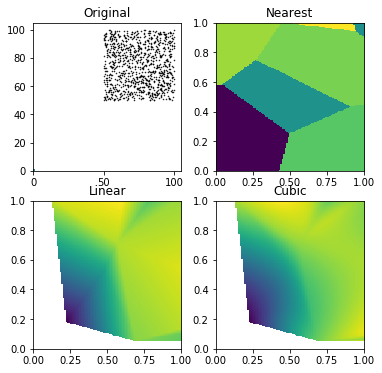

In [281]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

# np.random.uniform(0.0001, 0.0002, x.shape[0])

points = 50 + (np.random.rand(1000, 2) * 50)
grid_x, grid_y = np.mgrid[50:52:100j, 50:52:200j]
# points = np.random.uniform(50, 100, 50)
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()

C:\Users\temp3rr0r\Anaconda3\envs\tensorflow\lib\site-packages\scipy\interpolate\rbf.py:220: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.129645e-22
  self.nodes = linalg.solve(self.A, self.di)


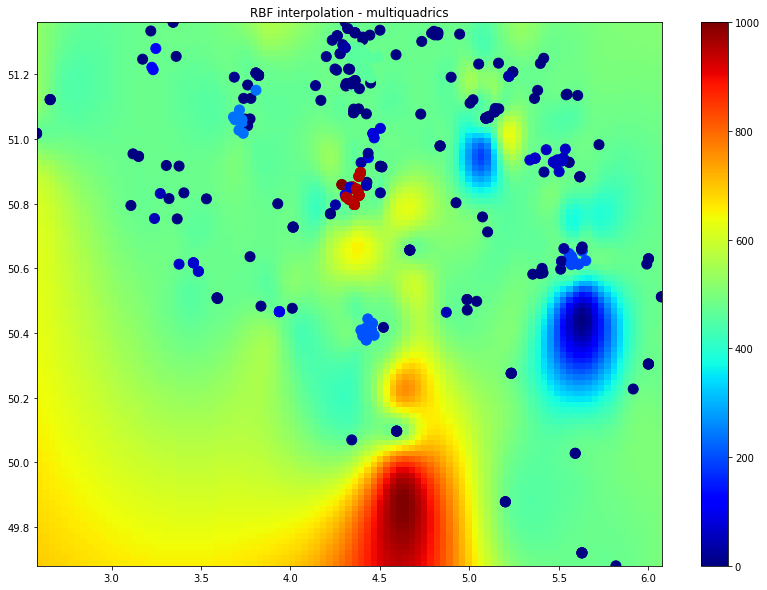

In [351]:


# 'multiquadric': sqrt((r/self.epsilon)**2 + 1)
# 'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
# 'gaussian': exp(-(r/self.epsilon)**2)
# 'linear': r
# 'cubic': r**3
# 'quintic': r**5
# 'thin_plate': r**2 * log(r)


# 0: lat
# 1: lon
# 2: "station_altitude":     
# 3: "population":                 
# 4: "type_of_station":
# 5: "station_type_of_area":
# 6: "station_characteristic_of_zone":
# 7: "station_ozone_classification":

np.random.seed(42)
x = coordinates[:,0]
y = coordinates[:,1] + np.random.uniform(0.0001, 0.0002, x.shape[0])
z = coordinates[:,2]
xMin = min(x)
xMax = max(x)
yMin = min(y)
yMax = max(y)
ti1 = np.linspace(xMin, xMax, 100)
ti2 = np.linspace(yMin, yMax, 100)
XI, YI = np.meshgrid(ti1, ti2)
rbf = Rbf(x, y, z, function="multiquadric")
ZI = rbf(XI, YI)
plt.figure(figsize=(14, 10))
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(xMin, xMax)
plt.ylim(yMin, yMax)
plt.colorbar()

In [304]:
rbf
